# CHIKV_Mac HIPPO FFF Prod. 6 (starting recipe)

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
import hippo
from pathlib import Path
from mlog import setup_logger
import pandas as pd
import numpy as np
import molparse as mp
logger=setup_logger('notebook')

In [2]:
# !cp -v CHIKV_prod5.sqlite CHIKV_prod6.sqlite

In [2]:
animal = hippo.HIPPO('CHIKV_prod6', 'CHIKV_prod6.sqlite')

Creating HIPPO animal
name = CHIKV_prod6
db_path = CHIKV_prod6.sqlite
DEBUG: hippo3.Database.__init__()
DEBUG: Database.path = CHIKV_prod6.sqlite
DEBUG: hippo3.Database.connect()
DEBUG: sqlite3.version='2.6.0'
 SUCCESS  Database connected @ CHIKV_prod6.sqlite!
DEBUG: HIPPO.Database.create_table_route()
DEBUG: HIPPO.Database.create_table_component()
 SUCCESS  Initialised animal HIPPO("CHIKV_prod6")!


In [3]:
bases = animal.compounds(tag='Syndirella base')
bases

compounds tagged Syndirella base: {C x 68}

In [132]:
# add on all elaborations for C93
selection = bases + animal.C93.elabs
selection

{C x 76}

## Generate the recipe

In [4]:
%%time
recipe = hippo.Recipe.from_compounds(bases, pick_cheapest_inner_routes=True, supplier='Enamine', quoted_only=True, debug=False)

#compounds = 68
Solving individual compound recipes...


  0%|          | 0/68 [00:00<?, ?it/s]

 ERROR  No entry in quote with quote_compound=91!
 ERROR  Reactants not available for reaction=R22: C4458 + C4459 -> C91 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=91!
 ERROR  Reactants not available for reaction=R23: C4458 + C4460 -> C91 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C91!


  1%|▏         | 1/68 [00:01<01:17,  1.15s/it]

 ERROR  No entry in quote with quote_compound=92!
 ERROR  Reactants not available for reaction=R32: C4470 + C4471 -> C92 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C92!


  3%|▎         | 2/68 [00:01<00:59,  1.10it/s]

 ERROR  No entry in quote with quote_compound=93!
 SUCCESS  Found solution for compound=C93!


  4%|▍         | 3/68 [00:03<01:17,  1.20s/it]

 ERROR  No entry in quote with quote_compound=95!
 SUCCESS  Found solution for compound=C95!


  6%|▌         | 4/68 [00:04<01:25,  1.34s/it]

 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R86: C4536 + C4537 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R87: C4536 + C4538 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R88: C4537 + C4539 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R89: C4538 + C4539 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C98!


  7%|▋         | 5/68 [00:06<01:37,  1.55s/it]

 ERROR  No entry in quote with quote_compound=100!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  Reactants not available for reaction=R26: C50 + C4463 -> C4464 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No entry in quote with quote_compound=100!
 ERROR  Reactants not available for reaction=R93: C4464 + C4544 -> C100 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C100!


  9%|▉         | 6/68 [00:09<01:50,  1.78s/it]

 ERROR  No entry in quote with quote_compound=101!
 ERROR  Reactants not available for reaction=R102: C4552 + C4553 -> C101 via Amidation!
 ERROR  No solutions for compound=C101!


 10%|█         | 7/68 [00:10<01:30,  1.49s/it]

 ERROR  No entry in quote with quote_compound=104!
 SUCCESS  Found solution for compound=C104!


 12%|█▏        | 8/68 [00:11<01:29,  1.48s/it]

 ERROR  No entry in quote with quote_compound=372!
 ERROR  Reactants not available for reaction=R12: C1468 + C4440 -> C372 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C372!


 13%|█▎        | 9/68 [00:12<01:12,  1.23s/it]

 ERROR  No entry in quote with quote_compound=555!
 ERROR  Reactants not available for reaction=R119: C4426 + C4572 -> C555 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=555!
 ERROR  Reactants not available for reaction=R120: C4426 + C4573 -> C555 via Ester_amidation!
 ERROR  No solutions for compound=C555!


 15%|█▍        | 10/68 [00:13<01:09,  1.21s/it]

 ERROR  No entry in quote with quote_compound=569!
 ERROR  Reactants not available for reaction=R50: C4491 + C4492 -> C569 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C569!


 16%|█▌        | 11/68 [00:14<01:00,  1.07s/it]

 ERROR  No solutions for compound=C576!


 18%|█▊        | 12/68 [00:14<00:46,  1.20it/s]

 ERROR  No entry in quote with quote_compound=596!
 ERROR  Reactants not available for reaction=R58: C4502 + C4503 -> C596 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C596!


 19%|█▉        | 13/68 [00:15<00:44,  1.24it/s]

 ERROR  No entry in quote with quote_compound=627!
 ERROR  Reactants not available for reaction=R1: C4423 + C4424 -> C627 via Amidation!
 ERROR  No solutions for compound=C627!


 21%|██        | 14/68 [00:15<00:42,  1.26it/s]

 ERROR  No entry in quote with quote_compound=653!
 ERROR  Reactants not available for reaction=R3: C4427 + C4428 -> C653 via Amidation!
 ERROR  No solutions for compound=C653!


 22%|██▏       | 15/68 [00:16<00:40,  1.31it/s]

 ERROR  No entry in quote with quote_compound=662!
 ERROR  No entry in quote with quote_compound=4469!
 ERROR  Reactants not available for reaction=R31: C4443 + C4468 -> C4469 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C662!


 24%|██▎       | 16/68 [00:18<00:54,  1.05s/it]

 ERROR  No entry in quote with quote_compound=680!
 ERROR  Reactants not available for reaction=R34: C18 + C4473 -> C680 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C680!


 25%|██▌       | 17/68 [00:19<00:48,  1.06it/s]

 ERROR  No entry in quote with quote_compound=718!
 ERROR  Reactants not available for reaction=R121: C19 + C4574 -> C718 via Nucleophilic_substitution_with_amine!
 ERROR  No solutions for compound=C718!


 26%|██▋       | 18/68 [00:19<00:43,  1.15it/s]

 ERROR  No entry in quote with quote_compound=760!
 ERROR  Reactants not available for reaction=R104: C4555 + C4556 -> C760 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol!
 ERROR  No solutions for compound=C760!


 28%|██▊       | 19/68 [00:20<00:39,  1.23it/s]

 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=796!
 Warning  Multiple solutions for compound=C796
 SUCCESS  Found solution for compound=C796!


 29%|██▉       | 20/68 [00:22<01:01,  1.28s/it]

 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R45: C4485 + C4486 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R46: C4487 + C4488 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R47: C4485 + C4488 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R48: C4486 + C4487 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C804!


 31%|███       | 21/68 [00:24<01:07,  1.44s/it]

 ERROR  No entry in quote with quote_compound=849!
 ERROR  Reactants not available for reaction=R16: C4440 + C4448 -> C849 via Ester_amidation!
 ERROR  No solutions for compound=C849!


 32%|███▏      | 22/68 [00:25<00:55,  1.21s/it]

 ERROR  No entry in quote with quote_compound=992!
 ERROR  Reactants not available for reaction=R63: C4510 + C4511 -> C992 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=992!
 ERROR  No entry in quote with quote_compound=4510!
 ERROR  Reactants not available for reaction=R62: C4508 + C4509 -> C4510 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C992!


 34%|███▍      | 23/68 [00:27<01:05,  1.46s/it]

 ERROR  No entry in quote with quote_compound=1001!
 SUCCESS  Found solution for compound=C1001!


 35%|███▌      | 24/68 [00:28<01:03,  1.44s/it]

 ERROR  No entry in quote with quote_compound=1012!
 ERROR  Reactants not available for reaction=R36: C4478 + C4479 -> C1012 via Amidation!
 ERROR  No solutions for compound=C1012!


 37%|███▋      | 25/68 [00:29<00:52,  1.22s/it]

 ERROR  No entry in quote with quote_compound=1029!
 ERROR  Reactants not available for reaction=R2: C4425 + C4426 -> C1029 via Amidation!
 ERROR  No solutions for compound=C1029!


 38%|███▊      | 26/68 [00:30<00:44,  1.06s/it]

 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R109: C4562 + C4563 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R110: C4562 + C4564 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R111: C4560 + C4562 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R112: C4558 + C4562 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C1119!


 40%|███▉      | 27/68 [00:31<00:53,  1.30s/it]

 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  Reactants not available for reaction=R106: C4557 + C4560 -> C1128 via Sp3-sp2_Suzuki_coupling!
 SUCCESS  Found solution for compound=C1128!


 41%|████      | 28/68 [00:33<00:58,  1.46s/it]

 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R5: C4431 + C4432 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R6: C4432 + C4433 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R7: C4432 + C4434 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R8: C4432 + C4435 -> C1192 via Ester_amidation!
 ERROR  No solutions for compound=C1192!


 43%|████▎     | 29/68 [00:35<01:02,  1.59s/it]

 ERROR  No entry in quote with quote_compound=1257!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  Reactants not available for reaction=R26: C50 + C4463 -> C4464 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C1257!


 44%|████▍     | 30/68 [00:37<01:02,  1.64s/it]

 ERROR  No entry in quote with quote_compound=1316!
 SUCCESS  Found solution for compound=C1316!


 46%|████▌     | 31/68 [00:38<00:57,  1.56s/it]

 ERROR  No entry in quote with quote_compound=1444!
 ERROR  Reactants not available for reaction=R101: C4424 + C4551 -> C1444 via Ester_amidation!
 ERROR  No solutions for compound=C1444!


 47%|████▋     | 32/68 [00:39<00:46,  1.30s/it]

 ERROR  No entry in quote with quote_compound=1446!
 ERROR  Reactants not available for reaction=R116: C4568 + C4569 -> C1446 via Amidation!
 ERROR  No solutions for compound=C1446!


 49%|████▊     | 33/68 [00:40<00:39,  1.12s/it]

 ERROR  No entry in quote with quote_compound=1466!
 ERROR  Reactants not available for reaction=R83: C4443 + C4531 -> C1466 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C1466!


 50%|█████     | 34/68 [00:40<00:33,  1.01it/s]

 ERROR  No entry in quote with quote_compound=1472!
 ERROR  Reactants not available for reaction=R59: C1468 + C4504 -> C1472 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C1472!


 51%|█████▏    | 35/68 [00:41<00:29,  1.11it/s]

 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1473!
 Warning  Multiple solutions for compound=C1473
 SUCCESS  Found solution for compound=C1473!


 53%|█████▎    | 36/68 [00:44<00:44,  1.38s/it]

 ERROR  No entry in quote with quote_compound=1476!
 ERROR  Reactants not available for reaction=R24: C4443 + C4461 -> C1476 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C1476!


 54%|█████▍    | 37/68 [00:44<00:36,  1.19s/it]

 ERROR  No entry in quote with quote_compound=1500!
 ERROR  Reactants not available for reaction=R10: C4437 + C4438 -> C1500 via Amidation!
 ERROR  No solutions for compound=C1500!


 56%|█████▌    | 38/68 [00:45<00:31,  1.06s/it]

 ERROR  No entry in quote with quote_compound=1602!
 ERROR  Reactants not available for reaction=R56: C4424 + C4500 -> C1602 via Ester_amidation!
 ERROR  No solutions for compound=C1602!


 57%|█████▋    | 39/68 [00:46<00:27,  1.04it/s]

 ERROR  No entry in quote with quote_compound=1917!
 SUCCESS  Found solution for compound=C1917!


 59%|█████▉    | 40/68 [00:47<00:30,  1.09s/it]

 ERROR  No entry in quote with quote_compound=1965!
 ERROR  Reactants not available for reaction=R4: C4429 + C4430 -> C1965 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C1965!


 60%|██████    | 41/68 [00:48<00:26,  1.01it/s]

 ERROR  No entry in quote with quote_compound=2138!
 ERROR  Reactants not available for reaction=R52: C4494 + C4495 -> C2138 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=2138!
 ERROR  Reactants not available for reaction=R53: C4494 + C4496 -> C2138 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C2138!


 62%|██████▏   | 42/68 [00:49<00:26,  1.02s/it]

 ERROR  No entry in quote with quote_compound=2186!
 ERROR  Reactants not available for reaction=R90: C4442 + C4540 -> C2186 via Ester_amidation!
 ERROR  No solutions for compound=C2186!


 63%|██████▎   | 43/68 [00:50<00:22,  1.09it/s]

 ERROR  No entry in quote with quote_compound=2188!
 ERROR  Reactants not available for reaction=R25: C4443 + C4462 -> C2188 via Amidation!
 ERROR  No solutions for compound=C2188!


 65%|██████▍   | 44/68 [00:50<00:20,  1.18it/s]

 ERROR  No entry in quote with quote_compound=2207!
 ERROR  Reactants not available for reaction=R91: C4541 + C4542 -> C2207 via Reductive_amination!
 ERROR  No solutions for compound=C2207!


 66%|██████▌   | 45/68 [00:51<00:18,  1.25it/s]

 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  Reactants not available for reaction=R21: C4454 + C4457 -> C4456 via Amidation!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C2300!


 68%|██████▊   | 46/68 [00:53<00:23,  1.07s/it]

 ERROR  No entry in quote with quote_compound=2311!
 ERROR  Reactants not available for reaction=R84: C4532 + C4533 -> C2311 via Nucleophilic_substitution_with_amine!
 ERROR  No solutions for compound=C2311!


 69%|██████▉   | 47/68 [00:53<00:20,  1.05it/s]

 ERROR  No entry in quote with quote_compound=2619!
 ERROR  Reactants not available for reaction=R13: C4441 + C4443 -> C2619 via Amidation!
 ERROR  No solutions for compound=C2619!


 71%|███████   | 48/68 [00:54<00:17,  1.16it/s]

 ERROR  No entry in quote with quote_compound=2916!
 SUCCESS  Found solution for compound=C2916!


 72%|███████▏  | 49/68 [00:55<00:19,  1.02s/it]

 ERROR  No entry in quote with quote_compound=2919!
 ERROR  Reactants not available for reaction=R99: C4439 + C4549 -> C2919 via Amidation!
 ERROR  No solutions for compound=C2919!


 74%|███████▎  | 50/68 [00:56<00:16,  1.08it/s]

 ERROR  No entry in quote with quote_compound=2924!
 ERROR  Reactants not available for reaction=R117: C3983 + C4571 -> C2924 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=2924!
 ERROR  Reactants not available for reaction=R118: C3983 + C4528 -> C2924 via Ester_amidation!
 ERROR  No solutions for compound=C2924!


 75%|███████▌  | 51/68 [00:57<00:16,  1.01it/s]

 ERROR  No entry in quote with quote_compound=2925!
 SUCCESS  Found solution for compound=C2925!


 76%|███████▋  | 52/68 [00:59<00:17,  1.11s/it]

 ERROR  No entry in quote with quote_compound=2944!
 ERROR  Reactants not available for reaction=R11: C4423 + C4439 -> C2944 via Amidation!
 ERROR  No solutions for compound=C2944!


 78%|███████▊  | 53/68 [00:59<00:14,  1.01it/s]

 ERROR  No entry in quote with quote_compound=2947!
 ERROR  Reactants not available for reaction=R65: C4439 + C4513 -> C2947 via Amidation!
 ERROR  No solutions for compound=C2947!


 79%|███████▉  | 54/68 [01:00<00:12,  1.10it/s]

 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R39: C4445 + C4481 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R40: C4447 + C4481 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R41: C4447 + C4482 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R42: C4445 + C4482 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C3204!


 81%|████████  | 55/68 [01:02<00:16,  1.26s/it]

 ERROR  No entry in quote with quote_compound=3264!
 ERROR  No entry in quote with quote_compound=4567!
 ERROR  Reactants not available for reaction=R113: C4565 + C4566 -> C4567 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No entry in quote with quote_compound=3264!
 ERROR  No entry in quote with quote_compound=4567!
 ERROR  Reactants not available for reaction=R113: C4565 + C4566 -> C4567 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C3264!


 82%|████████▏ | 56/68 [01:05<00:22,  1.84s/it]

 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R95: C4445 + C4547 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R96: C4445 + C4548 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R97: C4447 + C4548 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R98: C4447 + C4547 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C3269!


 84%|████████▍ | 57/68 [01:07<00:20,  1.87s/it]

 ERROR  No entry in quote with quote_compound=3284!
 ERROR  No entry in quote with quote_compound=3284!
 Warning  Multiple solutions for compound=C3284
 SUCCESS  Found solution for compound=C3284!


 85%|████████▌ | 58/68 [01:10<00:20,  2.04s/it]

 ERROR  No entry in quote with quote_compound=3344!
 ERROR  Reactants not available for reaction=R28: C4443 + C4465 -> C3344 via Amidation!
 ERROR  No solutions for compound=C3344!


 87%|████████▋ | 59/68 [01:11<00:14,  1.64s/it]

 ERROR  No entry in quote with quote_compound=3611!
 ERROR  Reactants not available for reaction=R55: C4498 + C4499 -> C3611 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C3611!


 88%|████████▊ | 60/68 [01:11<00:10,  1.36s/it]

 ERROR  No entry in quote with quote_compound=3624!
 SUCCESS  Found solution for compound=C3624!


 90%|████████▉ | 61/68 [01:13<00:09,  1.35s/it]

 ERROR  No entry in quote with quote_compound=3625!
 SUCCESS  Found solution for compound=C3625!


 91%|█████████ | 62/68 [01:14<00:08,  1.35s/it]

 ERROR  No entry in quote with quote_compound=3627!
 ERROR  Reactants not available for reaction=R100: C4452 + C4550 -> C3627 via Ester_amidation!
 ERROR  No solutions for compound=C3627!


 93%|█████████▎| 63/68 [01:15<00:05,  1.16s/it]

 ERROR  No entry in quote with quote_compound=3628!
 SUCCESS  Found solution for compound=C3628!


 94%|█████████▍| 64/68 [01:16<00:04,  1.23s/it]

 ERROR  No entry in quote with quote_compound=3632!
 ERROR  Reactants not available for reaction=R19: C4452 + C4453 -> C3632 via Amidation!
 ERROR  No solutions for compound=C3632!


 96%|█████████▌| 65/68 [01:17<00:03,  1.07s/it]

 ERROR  No entry in quote with quote_compound=3653!
 ERROR  Reactants not available for reaction=R44: C4452 + C4484 -> C3653 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C3653!


 97%|█████████▋| 66/68 [01:17<00:01,  1.03it/s]

 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R66: C3755 + C4514 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R67: C3755 + C4515 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R68: C3755 + C4516 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R69: C3755 + C4517 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R70: C3755 + C4518 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R71: C3755 + C4519 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R72: C3755 + C4520 -> C3668

 99%|█████████▊| 67/68 [01:24<00:02,  2.75s/it]

 ERROR  No entry in quote with quote_compound=3830!
 ERROR  Reactants not available for reaction=R107: C4449 + C4561 -> C3830 via Amidation!
 ERROR  No solutions for compound=C3830!


100%|██████████| 68/68 [01:25<00:00,  1.26s/it]

Solving recipe combinations...
Combining recipes...



100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

Picking cheapest...
CPU times: user 5.27 s, sys: 6.09 s, total: 11.4 s
Wall time: 1min 25s


In [6]:
recipe.write_CAR_csv('CHIKV_15bases_chemistry'

{R x 15}

In [249]:
fig = recipe.sankey()
mp.write('CHIKV_starting_recipe_sankey.html',fig)

 ERROR  No entry in quote with quote_compound=93!
 ERROR  No entry in quote with quote_compound=93!
 ERROR  No entry in quote with quote_compound=95!
 ERROR  No entry in quote with quote_compound=95!
 ERROR  No entry in quote with quote_compound=104!
 ERROR  No entry in quote with quote_compound=104!
 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=1001!
 ERROR  No entry in quote with quote_compound=1001!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1316!
 ERROR  No entry in quote with quote_compound=1316!
 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1917!
 ERROR  No entry in quote with quote_compound=1917!
 ERROR  No entry in quote with quote_compound=2916!
 ERROR  No entry in quot

In [250]:
recipe.write_json('CHIKV_starting_recipe.json')

 DISK  Writing CHIKV_starting_recipe.json


## Export to Fragalysis

In [ ]:
poses15.to_fragalysis('syndirella_scaffolds_15.sdf',
                      method='Accessible FFF Scaffolds',
                      submitter_name='Max Winokan',
                      submitter_email='max.winokan@diamond.ac.uk',
                      submitter_institution='DLS',
                     )

## Sanity check products

In [235]:
prods = recipe.products

In [236]:
for prod in prods:
    print(prod.id, prod.smiles, prod.inchikey, prod.elabs)

93 CCc1nc(NC(=O)c2ccnc(NC3CC=CC3)c2)no1 WXVLITNXXROEMR-UHFFFAOYSA-N elaborations of C93: {C x 8}
95 O=c1ccncn1CC1CCS(=O)(=O)C1 UGYMLSSIEIESGU-UHFFFAOYSA-N elaborations of C95: {C x 952}
104 Cn1c(N)nc2cccc(NCc3cccs3)c21 DGASNXVGKHJXGC-UHFFFAOYSA-N elaborations of C104: {C x 1452}
796 Nc1cc(-c2cc[nH]n2)cc2c1OCO2 RGWZNWCCBDMABV-UHFFFAOYSA-N elaborations of C796: {C x 197}
1001 COC(=O)c1cnc2[nH]cc(C)cc1-2 QZVYQICELPCZOV-UHFFFAOYSA-N None
1128 CC(C)c1cccc2[nH]cnc12 DZVXXHSUENHLJH-UHFFFAOYSA-N elaborations of C1128: {C x 1453}
1316 CC1CN(C(=O)c2cccc(F)c2)CCN1 GEKAQEZWMKZGCA-UHFFFAOYSA-N elaborations of C1316: {C x 1662}
1473 CC(C)(C)c1cnc2ccccc2n1 MMXSHBZOILNLPJ-UHFFFAOYSA-N elaborations of C1473: {C x 1352}
1917 CCc1nc(Cn2ccc(Br)cc2=O)no1 QQERROZMPKKQER-UHFFFAOYSA-N elaborations of C1917: {C x 803}
2916 COCC(=O)Nc1cccc(C(=O)NCc2cccs2)c1 QVSYFXSEJNFZKD-UHFFFAOYSA-N elaborations of C2916: {C x 1460}
2925 Cc1cccc(O)c1Nc1ccccc1 XQWKZXHQRAAZAF-UHFFFAOYSA-N elaborations of C2925: {C x 5434}
3284 

In [188]:
c = animal.C92
recipes = c.get_recipes()
recipes

#compounds = 1
Solving individual compound recipes...
 ERROR  No entry in quote with quote_compound=92!
 ERROR  No entry in quote with quote_compound=4470!
 SUCCESS  Found solution for compound=C92!
Solving recipe combinations...
Combining recipes...


[Recipe({I x 2} --> {I x 1} via {R x 1})]

In [184]:
selection.interactive()

Output()

In [191]:
for comp in selection:
    print(comp, comp.inchikey, 'Syndirella base' in comp.tags)

C91 WRQXFZOITXUYML-UHFFFAOYSA-N True
C92 SCMCRGMETQKMMQ-UHFFFAOYSA-N True
C93 WXVLITNXXROEMR-UHFFFAOYSA-N True
C95 UGYMLSSIEIESGU-UHFFFAOYSA-N True
C98 KRUZICJRZZZCFH-UHFFFAOYSA-N True
C100 LKSJOAHCUYUSRB-UHFFFAOYSA-N True
C101 OHSGHNZPVAYZHL-UHFFFAOYSA-N True
C104 DGASNXVGKHJXGC-UHFFFAOYSA-N True
C372 ALGNJYIWMHXFNH-UHFFFAOYSA-N True
C555 ZJENMQHSGLZNHL-UHFFFAOYSA-N True
C569 OYZLDUQCBJYBED-UHFFFAOYSA-N True
C576 TYBDSUPMDPIPBB-UHFFFAOYSA-N True
C596 JAHJLJNEYRGXQB-UHFFFAOYSA-N True
C627 SMVDAYWKXWVCAN-UHFFFAOYSA-N True
C653 FCGOSHSMTQLVEX-UHFFFAOYSA-N True
C662 CTECJTBKOFPTMY-UHFFFAOYSA-N True
C680 LKDGGWMXOHPRMI-UHFFFAOYSA-N True
C718 GQXYNJMUNPQGML-UHFFFAOYSA-N True
C760 WZMWLLZLOKQLRZ-UHFFFAOYSA-N True
C796 RGWZNWCCBDMABV-UHFFFAOYSA-N True
C804 JOXQXTUGOHUMII-UHFFFAOYSA-N True
C849 LSBSLADJXDRYPT-UHFFFAOYSA-N True
C992 VXOZIAXPIMEJPP-UHFFFAOYSA-N True
C1001 QZVYQICELPCZOV-UHFFFAOYSA-N True
C1012 KIULBMGWDSJTMM-UHFFFAOYSA-N True
C1029 MNLAWAQYKQVGLK-UHFFFAOYSA-N True
C1119 LCANJRPV

#compounds = 1
Solving individual compound recipes...
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4456!
 SUCCESS  Found solution for compound=C2300!
Solving recipe combinations...
Combining recipes...
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4454!


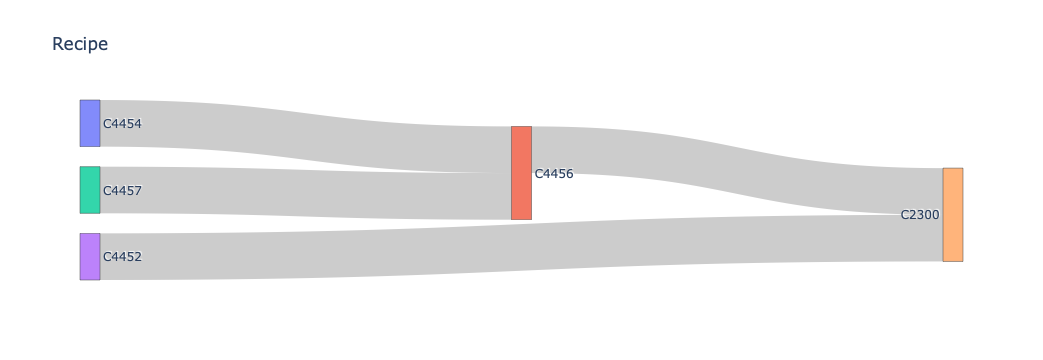

In [243]:
animal.compounds['WLFMTZKZYACXSW-UHFFFAOYSA-N'].get_recipes()[0].sankey()

In [211]:
df = animal.add_syndirella_elabs('/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/IBNRYRKGRKRSMK-NSHDSACASA-N/IBNRYRKGRKRSMK-NSHDSACASA-N_fMJ6FM_to_hippo.pkl.gz')
# df = animal.add_syndirella_elabs('/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/RTRFWLCSCBITKB-UHFFFAOYSA-N/RTRFWLCSCBITKB-UHFFFAOYSA-N_6PQWWH_to_hippo.pkl.gz')

Present reactions = {'N-Bn_deprotection', 'Amide_Schotten-Baumann_with_amine', 'Nucleophilic_substitution_with_amine', 'Amidation'}
 ERROR  No base/scaffold rows found in IBNRYRKGRKRSMK-NSHDSACASA-N_fMJ6FM_to_hippo.pkl.gz!


In [204]:
df = animal.add_syndirella_elabs('/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/RTRFWLCSCBITKB-UHFFFAOYSA-N/RTRFWLCSCBITKB-UHFFFAOYSA-N_6PQWWH_to_hippo.pkl.gz')

Present reactions = {'Ester_amidation', 'Amidation'}
 ERROR  No base/scaffold rows found in RTRFWLCSCBITKB-UHFFFAOYSA-N_6PQWWH_to_hippo.pkl.gz!


In [205]:
df.columns

Index(['base_compound_smiles', '1_reaction', '1_r1_smiles', '1_r2_smiles',
       '1_r_previous_product', '1_product_smiles', '1_product_name',
       '1_num_atom_diff', '1_flag', '2_reaction', '2_r1_smiles', '2_r2_smiles',
       '2_r_previous_product', '2_product_smiles', '2_product_name',
       '2_num_atom_diff', '2_flag', '2_stereoisomer', 'error', '∆∆G',
       '∆G_bound', '∆G_unbound', 'comRMSD', 'regarded', 'path_to_mol',
       'intra_geometry_pass'],
      dtype='object')

In [206]:
set(df['2_num_atom_diff'].values)

{1, 2, 3, 4, 5}

In [238]:
'YIIMVUSFSKUYCA-UHFFFAOYSA-N' in prods.inchikeys

False

In [239]:
for i in ["WLFMTZKZYACXSW-UHFFFAOYSA-N",
"OYAFCPFGSBONSE-UHFFFAOYSA-N",
"CTECJTBKOFPTMY-JTQLQIEISA-N",
"WLFMTZKZYACXSW-UHFFFAOYSA-N",
"OYZLDUQCBJYBED-VIFPVBQESA-N",
"SBEBTLKTHHBVAY-LLVKDONJSA-N",
"XXPRWRCNORVHSY-UHFFFAOYSA-N",
"JAHJLJNEYRGXQB-RBSFLKMASA-N",
"VXOZIAXPIMEJPP-UHFFFAOYSA-N",
"UQJZJBUURJWCJN-UHFFFAOYSA-N",
"LKSJOAHCUYUSRB-UHFFFAOYSA-N",
"CVNPYWIROGTFDL-UHFFFAOYSA-N",]:
    if i in prods.inchikeys:
        print(i)

In [246]:
animal.C4452.get_quotes(df=True)

,id,smiles,supplier,catalogue,entry,amount,price,purity,lead_time,date,type
0,32,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,20.0,€17.00 EUR,0.95,5,2024-09-25,None
1,5295,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,50.0,€18.00 EUR,0.95,5,2024-09-25,None
2,10558,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,100.0,€18.00 EUR,0.95,5,2024-09-25,None
3,15821,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,250.0,€18.00 EUR,0.95,5,2024-09-25,None


In [254]:
recipe.products.compounds.poses.num_inspirations

18

In [258]:
recipe.products.compounds.poses.num_inspiration_sets

14

In [257]:
bases.poses.num_inspirations

62

In [266]:
for comp in animal.compounds(tag='knitwork'):
    print(comp, comp)

AttributeError: 'Compound' object has no attribute 'exports'